Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


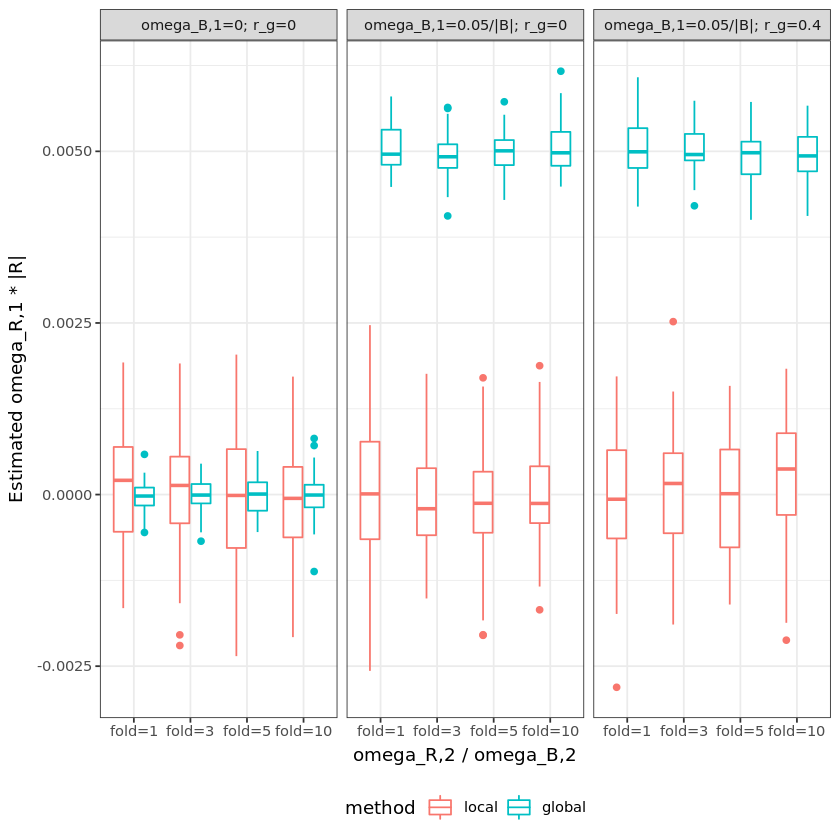

In [1]:
library(ggplot2)


out_Omega <- readRDS(file = "/home/share/mingxuan/taam/revision/results/Omega_NULL.RDS")
out_rho <- readRDS(file = "/home/share/mingxuan/taam/revision/results/rho_NULL.RDS")
out_t1e_all <- readRDS(file = "/home/share/mingxuan/taam/revision/results/t1e_NULL.RDS")
pval_pop1 <- readRDS(file = "/home/share/mingxuan/taam/revision/results/pval1_NULL.RDS")
pval_pop2 <- readRDS(file = "/home/share/mingxuan/taam/revision/results/pval2_NULL.RDS")


################## Fig R15 ##################
out_Omega$rg_bg <- paste0("r_g=", out_Omega$rg_bg)
out_Omega$variance[out_Omega$method == "local"] <- out_Omega$variance[out_Omega$method == "local"] * 1000
out_Omega$variance[out_Omega$method == "global"] <- out_Omega$variance[out_Omega$method == "global"] * 1000
out_Omega$fold <- factor(paste0("fold=", out_Omega$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_Omega$omega1_bg[out_Omega$omega1_bg != 0] <- paste0(out_Omega$omega1_bg[out_Omega$omega1_bg != 0] * 9000, "/|B|")
out_Omega$omega1_bg <- paste0("omega_B,1=", out_Omega$omega1_bg)
out_Omega$case <- paste0(out_Omega$omega1_bg, "; ", out_Omega$rg_bg)
ggplot(out_Omega[out_Omega$case != "omega_B,1=0; r_g=0.4" & out_Omega$component == "omega1",], aes(y = variance, x = factor(fold), color = method)) +
  geom_boxplot() +
  facet_wrap(. ~ case) +
  ylab("Estimated omega_R,1 * |R|") +
  xlab("omega_R,2 / omega_B,2") +
  theme_bw() +
  theme(legend.position = "bottom")


Warning message:
“Removed 398 rows containing non-finite values (stat_boxplot).”

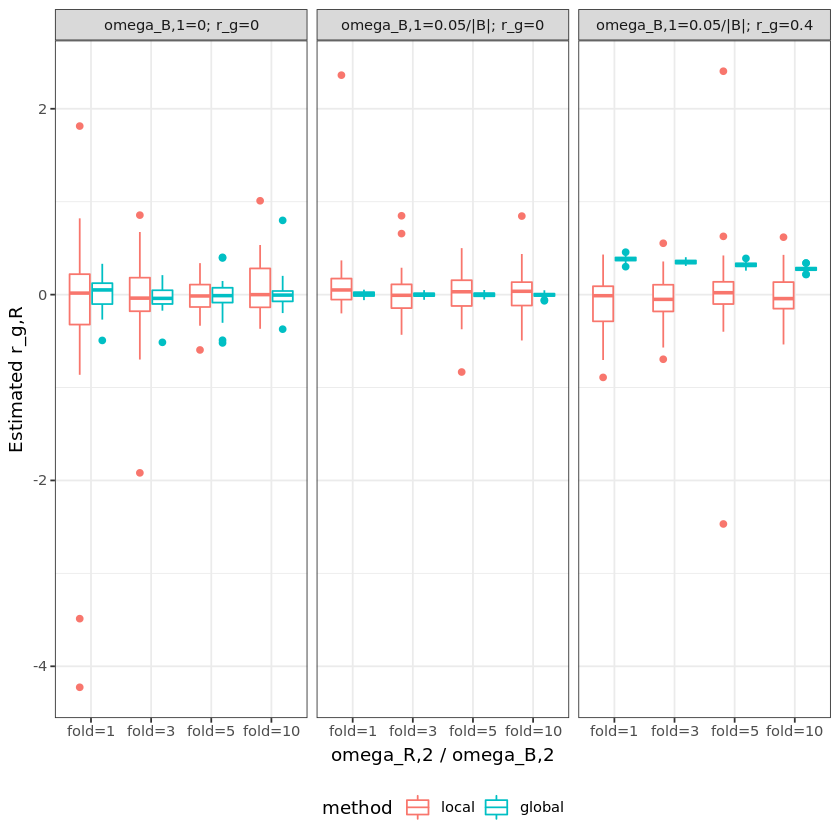

In [2]:
################## Fig R16 ##################
out_rho$rg_bg <- paste0("r_g=", out_rho$rg_bg)
out_rho$variance[out_rho$method == "local"] <- out_rho$variance[out_rho$method == "local"] * 1000
out_rho$variance[out_rho$method == "global"] <- out_rho$variance[out_rho$method == "global"] * 1000
out_rho$fold <- factor(paste0("fold=", out_rho$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_rho$omega1_bg[out_rho$omega1_bg != 0] <- paste0(out_rho$omega1_bg[out_rho$omega1_bg != 0] * 9000, "/|B|")
out_rho$omega1_bg <- paste0("omega_B,1=", out_rho$omega1_bg)
out_rho$case <- paste0(out_rho$omega1_bg, "; ", out_rho$rg_bg)
ggplot(out_rho[out_rho$case != "omega_B,1=0; r_g=0.4",], aes(y = rg, x = factor(fold), color = method)) +
  geom_boxplot() +
  facet_wrap(. ~ case) +
  ylab("Estimated r_g,R") +
  xlab("omega_R,2 / omega_B,2") +
  theme_bw() +
  theme(legend.position = "bottom")



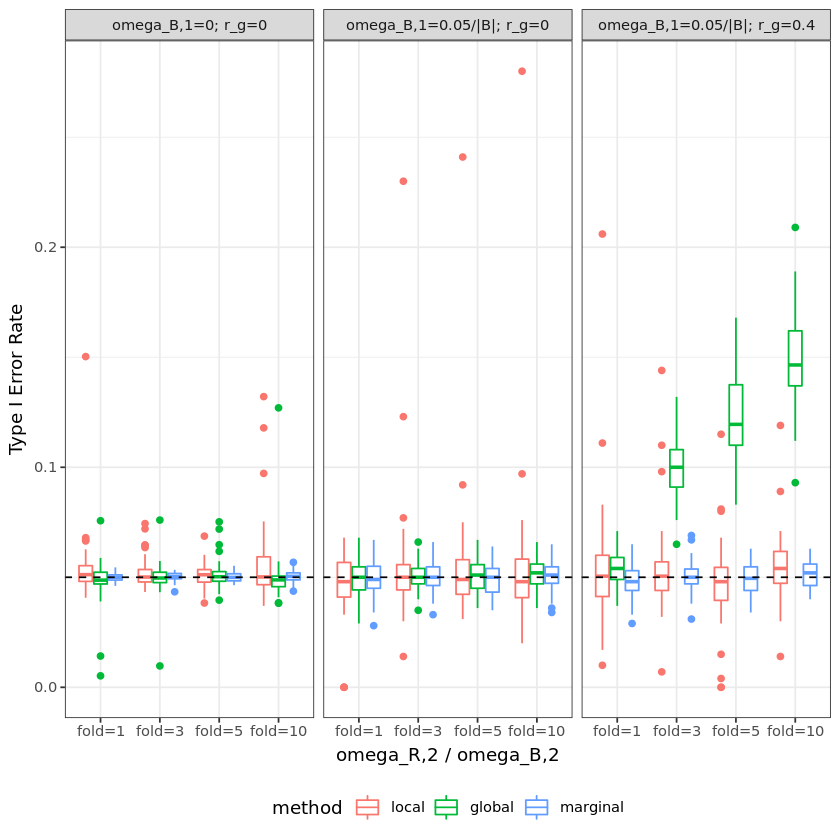

In [3]:
################## Fig R14 ##################
out_t1e_all$rg_bg <- paste0("r_g=", out_t1e_all$rg_bg)
out_t1e_all$method <- factor(out_t1e_all$method, levels = c("local", "global", "marginal"))
out_t1e_all$fold <- factor(paste0("fold=", out_t1e_all$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_t1e_all$omega1_bg[out_t1e_all$omega1_bg != 0] <- paste0(out_t1e_all$omega1_bg[out_t1e_all$omega1_bg != 0] * 9000, "/|B|")
out_t1e_all$omega1_bg <- paste0("omega_B,1=", out_t1e_all$omega1_bg)
out_t1e_all$case <- paste0(out_t1e_all$omega1_bg, "; ", out_t1e_all$rg_bg)
ggplot(out_t1e_all[out_t1e_all$case != "omega_B,1=0; r_g=0.4" & out_t1e_all$method %in% c("local", "global", "marginal"),], aes(y = t1e, x = factor(fold), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0.05, linetype = "dashed") +
  ylab("Type I Error Rate") +
  xlab("omega_R,2 / omega_B,2") +
  facet_wrap(. ~ case) +
  # coord_cartesian(ylim = c(0,0.2))+
  theme_bw() +
  theme(legend.position = "bottom")


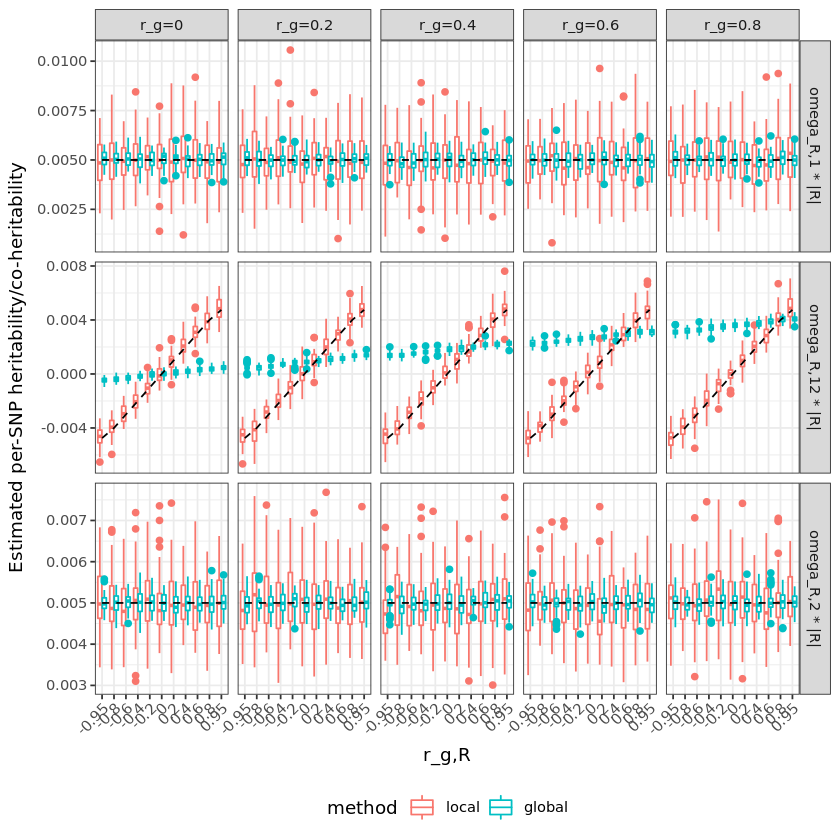

In [4]:
out_Omega <- readRDS(file = "/home/share/mingxuan/taam/revision/results/Omega_nonNULL_sparse.RDS")
out_rho <- readRDS(file = "/home/share/mingxuan/taam/revision/results/rho_nonNULL_sparse.RDS")
out_power <- readRDS(file = "/home/share/mingxuan/taam/revision/results/power_nonNULL_sparse.RDS")

################## Fig R17 ##################
out_Omega$rg_bg <- paste0("r_g=", out_Omega$rg_bg)
out_Omega$variance[out_Omega$method == "local"] <- out_Omega$variance[out_Omega$method == "local"] * 1000
out_Omega$variance[out_Omega$method == "global"] <- out_Omega$variance[out_Omega$method == "global"] * 1000
out_Omega$component <- gsub("omega", "omega_R,", out_Omega$component)
out_Omega$component <- paste0(out_Omega$component, " * |R|")
ref_line <- data.frame(rg = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95), each = 5),
                       variance = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95) * 0.05 / 10000 * 1000, each = 5),
                       component = "omega_R,12 * |R|",
                       rg_bg = rep(paste0("r_g=", c(0, 0.2, 0.4, 0.6, 0.8)), 11))
ref_line <- rbind(ref_line, data.frame(rg = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95), each = 5),
                                       variance = rep(0.05 / 10000 * 1000, 5 * 11),
                                       component = "omega_R,1 * |R|",
                                       rg_bg = rep(paste0("r_g=", c(0, 0.2, 0.4, 0.6, 0.8)), 11)))
ref_line <- rbind(ref_line, data.frame(rg = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95), each = 5),
                                       variance = rep(0.05 / 10000 * 1000, 5 * 11),
                                       component = "omega_R,2 * |R|",
                                       rg_bg = rep(paste0("r_g=", c(0, 0.2, 0.4, 0.6, 0.8)), 11)))
ggplot(out_Omega) +
  geom_boxplot(aes(y = variance, x = factor(rg), color = method)) +
  facet_grid(component ~ rg_bg, scales = "free") +
  geom_line(aes(y = variance, x = factor(rg), group = 1), data = ref_line, linetype = "dashed") +
  ylab("Estimated per-SNP heritability/co-heritability") +
  xlab("r_g,R") +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))



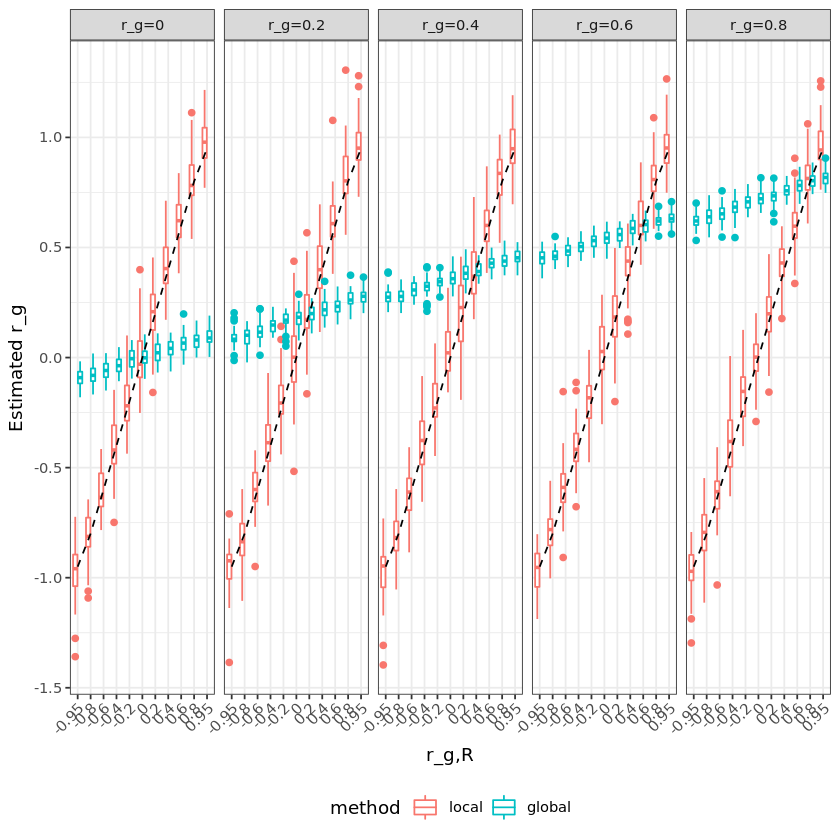

In [5]:
################## Fig R18 ##################
out_rho$rg_bg <- paste0("r_g=", out_rho$rg_bg)
ref_line <- data.frame(rg = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95), each = 5),
                       rg.1 = rep(c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95), each = 5),
                       rg_bg = rep(paste0("r_g=", c(0, 0.2, 0.4, 0.6, 0.8)), 11))
ggplot(out_rho) +
  geom_boxplot(aes(y = rg, x = factor(rg.1), color = method)) +
  facet_grid(. ~ rg_bg) +
  geom_line(aes(y = rg, x = factor(rg.1), group = 1), data = ref_line, linetype = "dashed") +
  ylab("Estimated r_g") +
  xlab("r_g,R") +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))


Warning message in out_power$rg_bg %in% paste0("r_g,B=", c(0, 0.2, 0.4, 0.6)) & :
“longer object length is not a multiple of shorter object length”

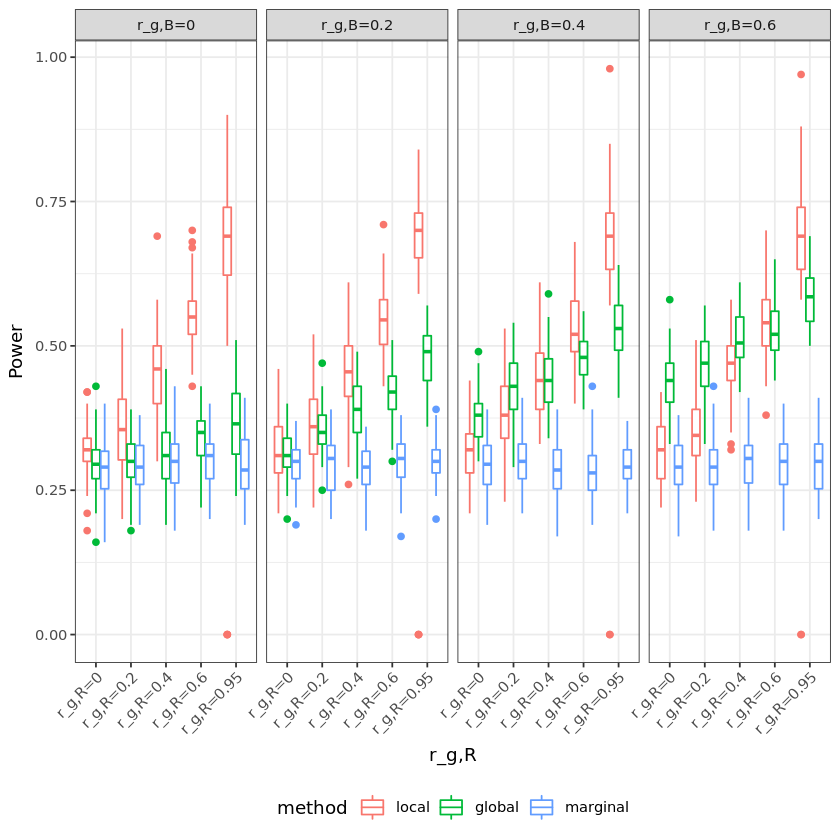

In [6]:
################## Fig R19 ##################
out_power$rg_bg <- paste0("r_g,B=", out_power$rg_bg)
out_power$rg <- factor(paste0("r_g,R=", out_power$rg), levels = paste0("r_g,R=", c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95)))
# out_t1e_all$h1 <- factor(paste0("omega_2=",out_t1e_all$h1),levels=unique(paste0("omega_2=",out_t1e_all$h1)))
out_power$method <- factor(out_power$method, levels = c("local", "global", "marginal"))
ggplot(out_power[out_power$rg_bg %in% paste0("r_g,B=", c(0, 0.2, 0.4, 0.6)) &
                   out_power$rg %in% paste0("r_g,R=", c(0, 0.2, 0.4, 0.6, 0.95)) &
                   out_t1e_all$method %in% c("local", "global", "marginal"),], aes(y = power, x = factor(rg), color = method)) +
  geom_boxplot() +
  # geom_hline(yintercept = 0.05,linetype="dashed") +
  ylab("Power") +
  xlab("r_g,R") +
  facet_grid(. ~ rg_bg) +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))

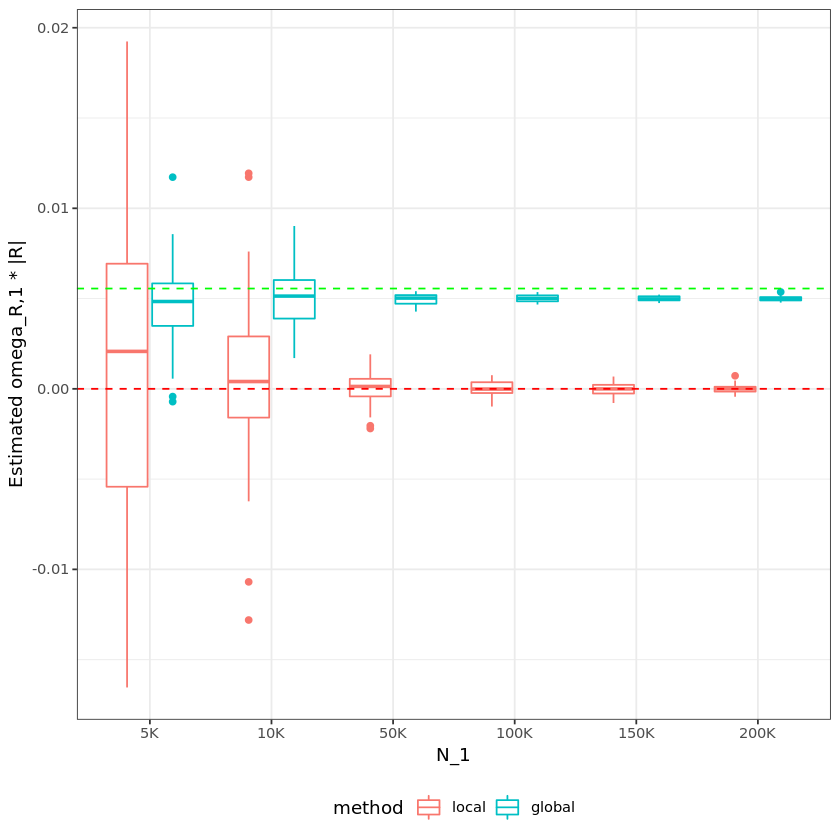

In [7]:
out_Omega <- readRDS(file = "/home/share/mingxuan/taam/revision/results/Omega_NULL_n.RDS")
out_rho <- readRDS(file = "/home/share/mingxuan/taam/revision/results/rho_NULL_n.RDS")
out_t1e_all <- readRDS(file = "/home/share/mingxuan/taam/revision/results/t1e_NULL_n.RDS")

################## Fig R20A ##################
out_Omega$rg_bg <- paste0("r_g=", out_Omega$rg_bg)
out_Omega$variance[out_Omega$method == "local"] <- out_Omega$variance[out_Omega$method == "local"] * 1000
out_Omega$variance[out_Omega$method == "global"] <- out_Omega$variance[out_Omega$method == "global"] * 1000
out_Omega$fold <- factor(paste0("fold=", out_Omega$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_Omega$omega1_bg[out_Omega$omega1_bg != 0] <- paste0(out_Omega$omega1_bg[out_Omega$omega1_bg != 0] * 9000, "/|B|")
out_Omega$omega1_bg <- paste0("omega_1,B=", out_Omega$omega1_bg)
out_Omega$case <- paste0(out_Omega$omega1_bg, "; ", out_Omega$rg_bg)
out_Omega$n1 <- factor(paste0(out_Omega$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_Omega[out_Omega$case != "omega_1,B=0; r_g=0.4" & out_Omega$component == "omega1",], aes(y = variance, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = 0.05 / 9000 * 1000, linetype = "dashed", color = "green") +
  # facet_wrap(.~case) +
  ylab("Estimated omega_R,1 * |R|") +
  xlab("N_1") +
  theme_bw() +
  theme(legend.position = "bottom")


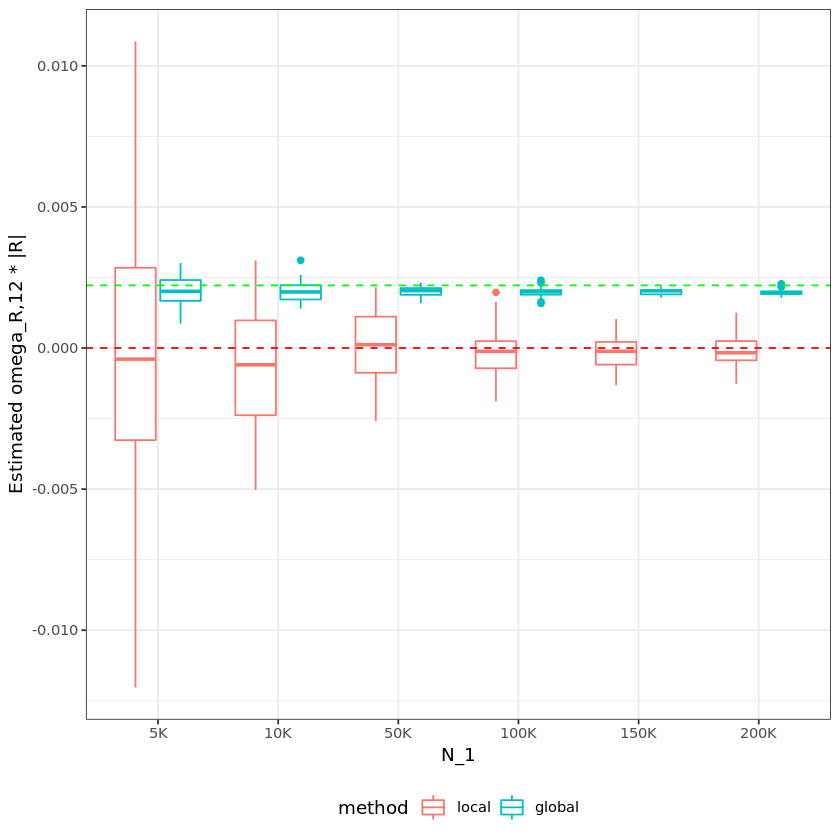

In [8]:
################## Fig R20B ##################
ggplot(out_Omega[out_Omega$case != "omega_1,B=0; r_g=0.4" & out_Omega$component == "omega12",], aes(y = variance, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = 0.05 / 9000 * 1000 * 0.4, linetype = "dashed", color = "green") +
  # facet_wrap(.~case) +
  ylab("Estimated omega_R,12 * |R|") +
  xlab("N_1") +
  theme_bw() +
  theme(legend.position = "bottom")


Warning message:
“Removed 134 rows containing non-finite values (stat_boxplot).”

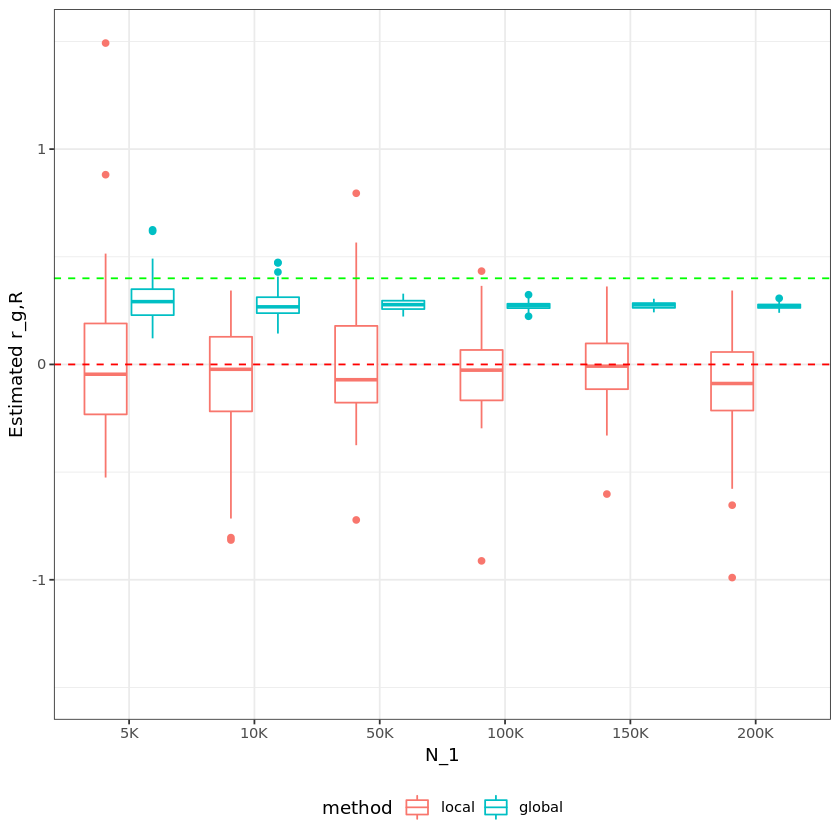

In [9]:
################## Fig R20C ##################
out_rho$rg_bg <- paste0("r_g=", out_rho$rg_bg)
out_rho$variance[out_rho$method == "local"] <- out_rho$variance[out_rho$method == "local"] * 1000
out_rho$variance[out_rho$method == "global"] <- out_rho$variance[out_rho$method == "global"] * 1000
out_rho$fold <- factor(paste0("fold=", out_rho$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_rho$omega1_bg[out_rho$omega1_bg != 0] <- paste0(out_rho$omega1_bg[out_rho$omega1_bg != 0] * 9000, "/|B|")
out_rho$omega1_bg <- paste0("omega_1,B=", out_rho$omega1_bg)
out_rho$case <- paste0(out_rho$omega1_bg, "; ", out_rho$rg_bg)
out_rho$n1 <- factor(paste0(out_rho$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_rho[out_rho$case != "omega_1,B=0; r_g=0.4",], aes(y = rg, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  geom_hline(yintercept = 0.4, linetype = "dashed", color = "green") +
  # facet_wrap(.~case) +
  ylab("Estimated r_g,R") +
  xlab("N_1") +
  coord_cartesian(ylim = c(-1.5, 1.5)) +
  theme_bw() +
  theme(legend.position = "bottom")



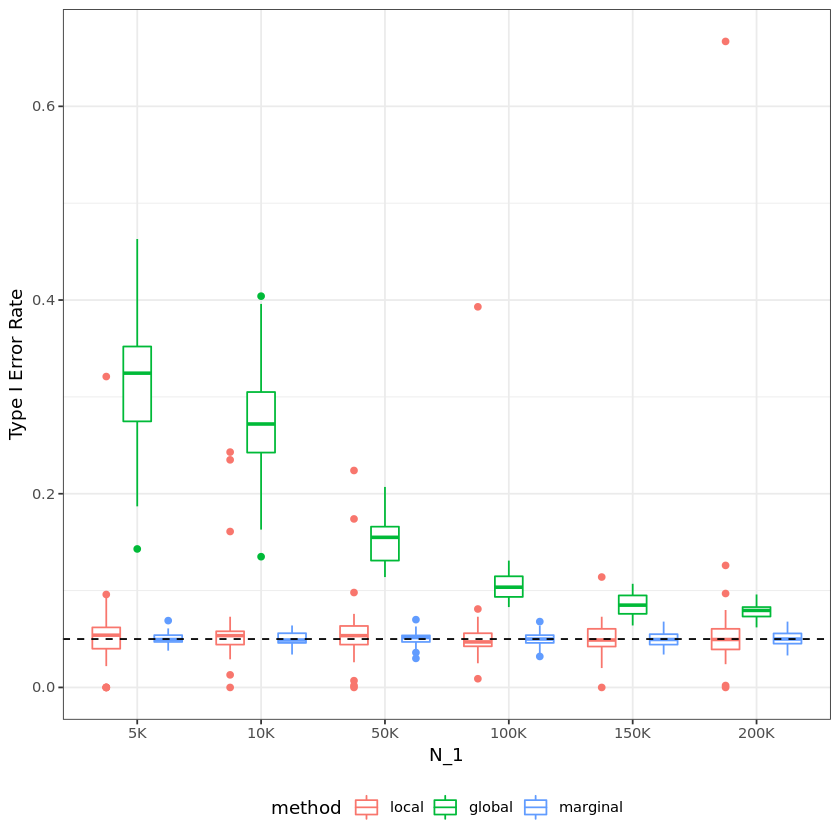

In [10]:
################## Fig R20D ##################
out_t1e_all$rg_bg <- paste0("r_g=", out_t1e_all$rg_bg)
out_t1e_all$method <- factor(out_t1e_all$method, levels = c("local", "global", "marginal"))
out_t1e_all$fold <- factor(paste0("fold=", out_t1e_all$omega2_local / (0.05 / 9000)), levels = paste0("fold=", c(1, 3, 5, 10)))
out_t1e_all$omega1_bg[out_t1e_all$omega1_bg != 0] <- paste0(out_t1e_all$omega1_bg[out_t1e_all$omega1_bg != 0] * 9000, "/|B|")
out_t1e_all$omega1_bg <- paste0("omega_1,B=", out_t1e_all$omega1_bg)
out_t1e_all$case <- paste0(out_t1e_all$omega1_bg, "; ", out_t1e_all$rg_bg)
out_t1e_all$n1 <- factor(paste0(out_t1e_all$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_t1e_all[out_t1e_all$case != "omega_1,B=0; r_g=0.4" & out_t1e_all$method %in% c("local", "global", "marginal"),], aes(y = t1e, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0.05, linetype = "dashed") +
  ylab("Type I Error Rate") +
  xlab("N_1") +
  # facet_wrap(.~case) +
  # coord_cartesian(ylim = c(0,0.2))+
  theme_bw() +
  theme(legend.position = "bottom")



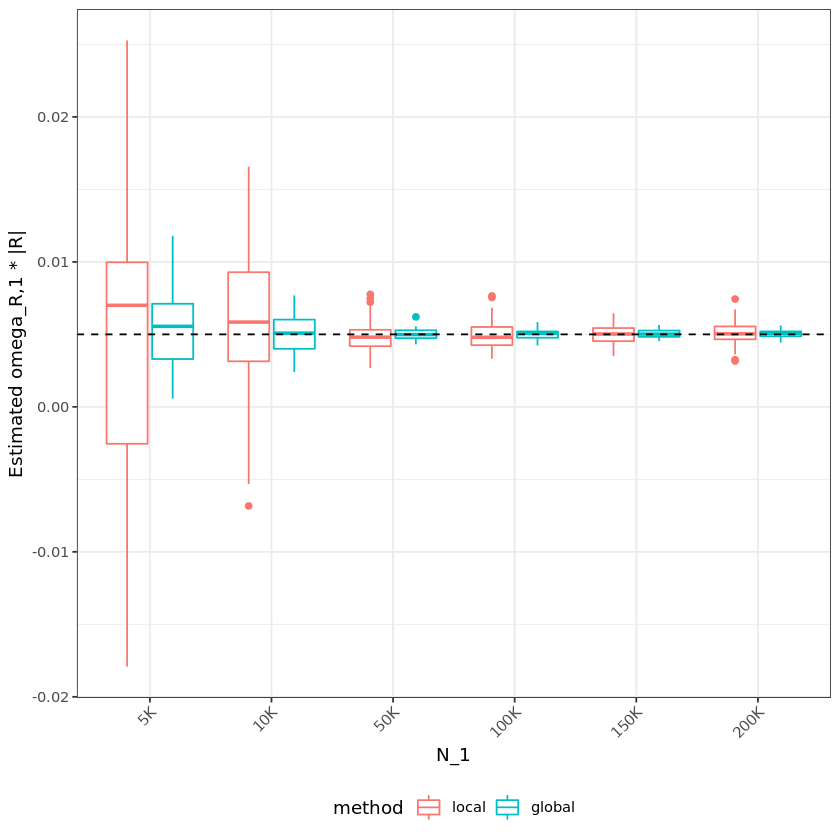

In [11]:
out_Omega <- readRDS("/home/share/mingxuan/taam/revision/results/Omega_nonNULL_sparse_n.RDS")
out_rho <- readRDS("/home/share/mingxuan/taam/revision/results/rho_nonNULL_sparse_n.RDS")
out_power <- readRDS("/home/share/mingxuan/taam/revision/results/power_nonNULL_sparse_n.RDS")


################## Fig R21A ##################
out_Omega$variance[out_Omega$method == "local"] <- out_Omega$variance[out_Omega$method == "local"] * 1000
out_Omega$variance[out_Omega$method == "global"] <- out_Omega$variance[out_Omega$method == "global"] * 1000
out_Omega$component <- paste0(out_Omega$component, " * |R|")
out_Omega$n1 <- factor(paste0(out_Omega$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_Omega[out_Omega$component == "omega1 * |R|",], aes(y = variance, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0.05 / 10000 * 1000, linetype = "dashed") +
  # geom_hline(yintercept = 0.4,linetype="dashed",color="green")+
  # facet_grid(component~.,scales="free") +
  ylab("Estimated omega_R,1 * |R|") +
  xlab("N_1") +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))


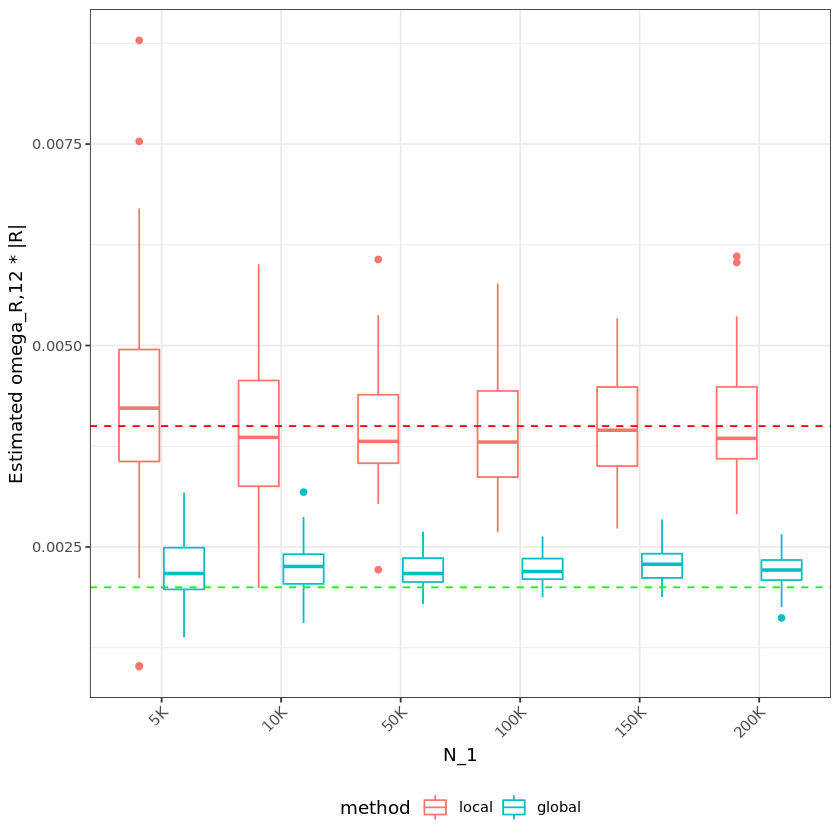

In [12]:
################## Fig R21B ##################
ggplot(out_Omega[out_Omega$component == "omega12 * |R|",], aes(y = variance, x = factor(n1), color = method)) +
  geom_boxplot() +
  geom_hline(yintercept = 0.05 / 10000 * 1000 * 0.8, linetype = "dashed", color = "red") +
  geom_hline(yintercept = 0.05 / 10000 * 1000 * 0.4, linetype = "dashed", color = "green") +
  # facet_grid(component~.,scales="free") +
  ylab("Estimated omega_R,12 * |R|") +
  xlab("N_1") +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))


Warning message:
“Removed 25 rows containing non-finite values (stat_boxplot).”

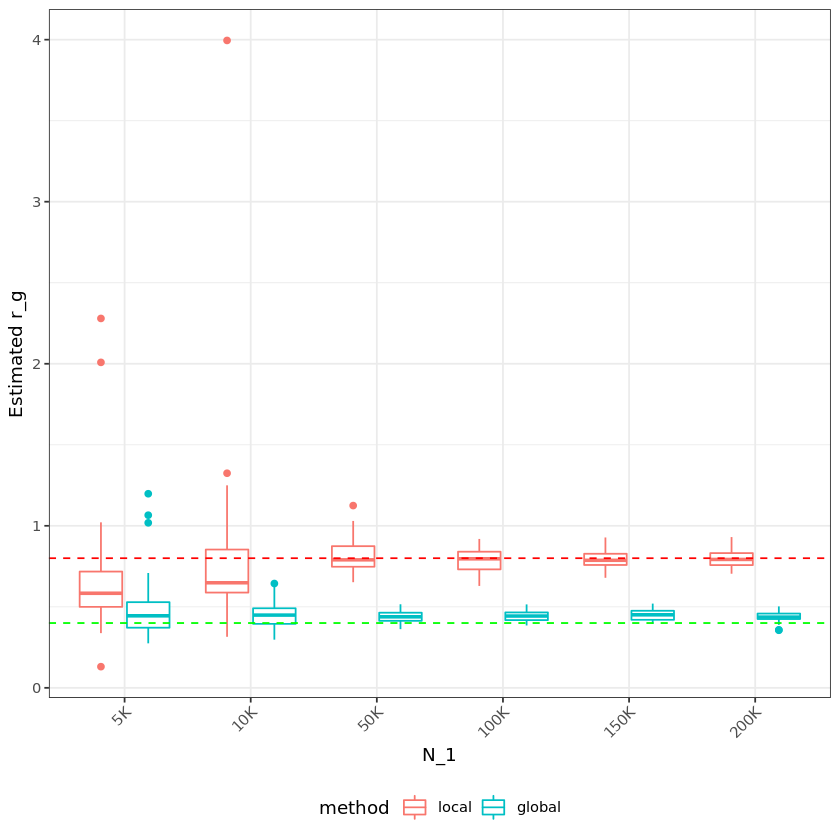

In [13]:
################## Fig R21C ##################
out_rho$rg_bg <- paste0("r_g=", out_rho$rg_bg)
out_rho$n1 <- factor(paste0(out_rho$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_rho, aes(y = rg, x = factor(n1), color = method)) +
  geom_boxplot() +
  # geom_hline(data = data.frame(method=c("local","global"),true_rg=c(0.8,0.4)),aes(yintercept = true_rg,color=method),linetype="dashed")+
  geom_hline(yintercept = 0.8, linetype = "dashed", color = "red") +
  geom_hline(yintercept = 0.4, linetype = "dashed", color = "green") +
  # facet_grid(.~rg_bg) +
  ylab("Estimated r_g") +
  xlab("N_1") +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))


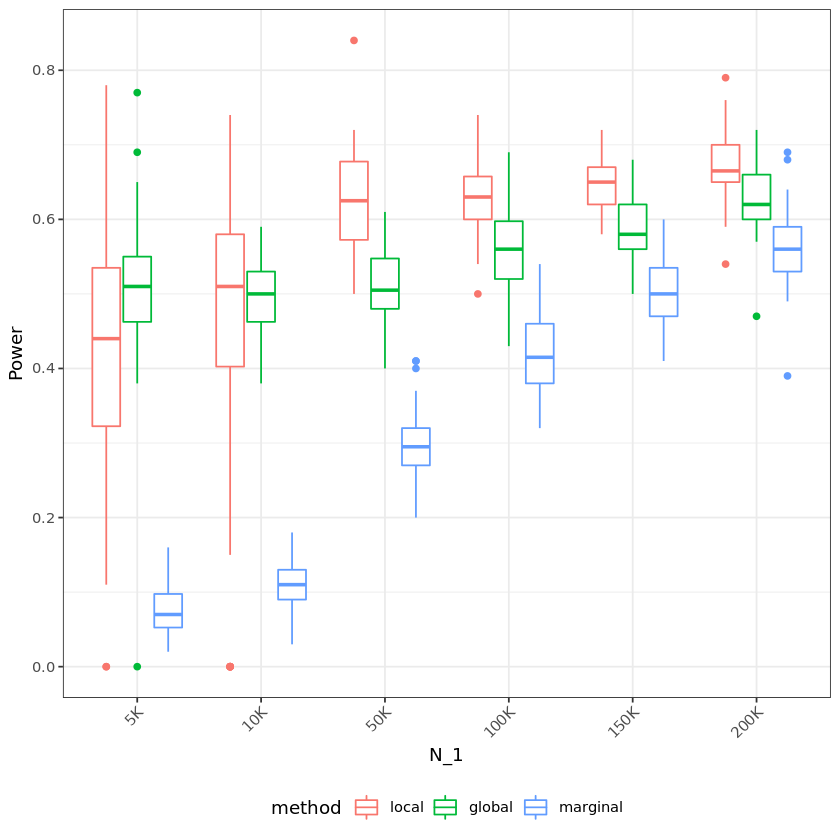

In [14]:
################## Fig R21D ##################
out_power$rg_bg <- paste0("r_g,B=", out_power$rg_bg)
out_power$rg <- factor(paste0("r_g,R=", out_power$rg), levels = paste0("r_g,R=", c(-0.95, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 0.95)))
# out_t1e_all$h1 <- factor(paste0("omega_2=",out_t1e_all$h1),levels=unique(paste0("omega_2=",out_t1e_all$h1)))
out_power$method <- factor(out_power$method, levels = c("local", "global", "marginal"))
out_power$n1 <- factor(paste0(out_power$n1 / 1000, "K"), levels = paste0(c(5, 10, 50, 100, 150, 200), "K"))
ggplot(out_power[out_power$method %in% c("local", "global", "marginal"),], aes(y = power, x = factor(n1), color = method)) +
  geom_boxplot() +
  # geom_hline(yintercept = 0.05,linetype="dashed") +
  ylab("Power") +
  xlab("N_1") +
  # facet_grid(.~rg_bg) +
  theme_bw() +
  theme(legend.position = "bottom", axis.text.x = element_text(angle = 45, hjust = 1))
